In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [316]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
len(df)

299

In [185]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

In [181]:
df_female = df[df.sex ==0]
df_male = df[df.sex ==1]

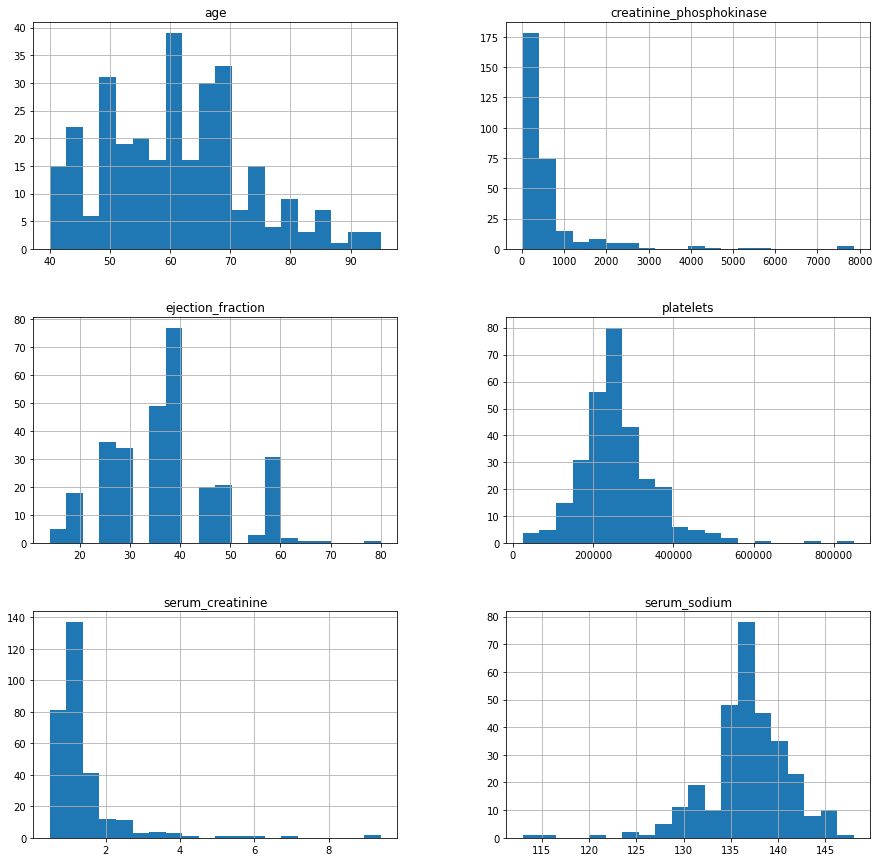

In [8]:
df[['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20,
                                                                               figsize=(15, 15))
plt.show()

In [187]:
continous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

In [312]:
df[continous_var].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.640357,0.074016,0.476045,0.309833,0.148285,0.923145
std,0.125209,0.123431,0.147936,0.115064,0.110054,0.029814
min,0.421053,0.002926,0.175000,0.029529,0.053191,0.763514
25%,0.536842,0.014820,0.375000,0.250000,0.095745,0.905405
50%,0.631579,0.031803,0.475000,0.308235,0.117021,0.925676
75%,0.736842,0.074036,0.562500,0.357059,0.148936,0.945946
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\sea

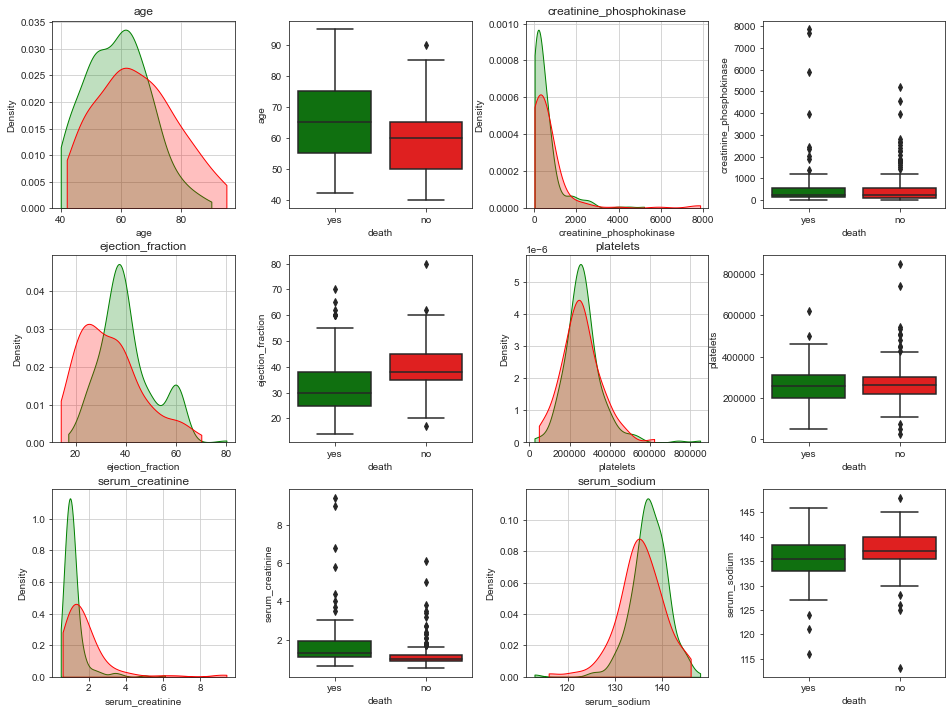

In [198]:
plt.figure(figsize=(16, 25))

for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])   

In [10]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [317]:
df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})
df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,yes


In [28]:
df = df.dropna()

In [30]:
df.anaemia.unique()

array([0, 1], dtype=int64)

In [31]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [32]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [33]:
df['high_blood_pressure'].unique()

array([1, 0], dtype=int64)

In [38]:
x = pd.crosstab(df["sex1"], df['death'])
x

death,no,yes
sex1,,
Female,71,34
Male,132,62


In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

In [40]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


In [44]:
df.groupby(['sex1', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

In [53]:
import seaborn as sns

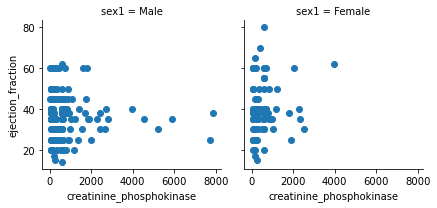

In [58]:
#plt.figure(figsize=(10, 10))
sns.FacetGrid(df, col = "sex1").map(plt.scatter, 'creatinine_phosphokinase',
       'ejection_fraction').add_legend()


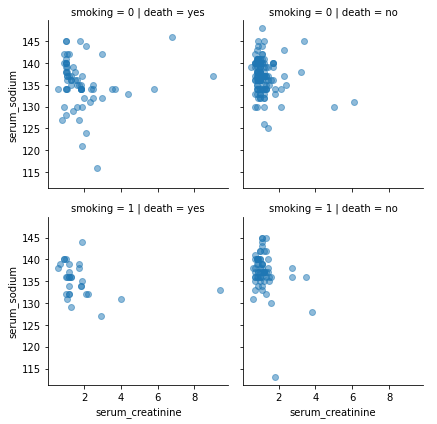

In [59]:
sns.FacetGrid(df, col="death", row="smoking").map(plt.scatter, 
                                                  'serum_creatinine', 
                                                  'serum_sodium', alpha=0.5).add_legend()

In [61]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


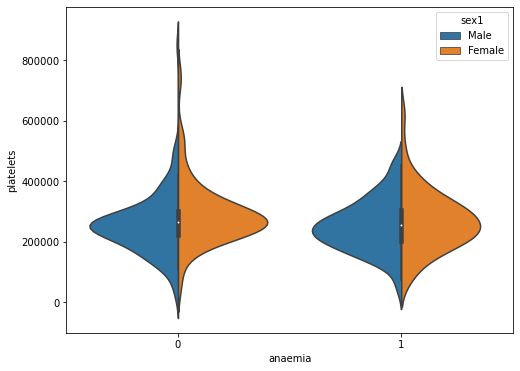

In [69]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.anaemia, df.platelets, hue=df.sex1, split=True)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


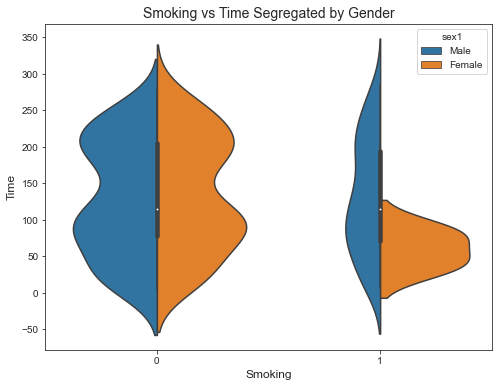

In [236]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.smoking, df.time, hue=df.sex1, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='high_blood_pressure', ylabel='ejection_fraction'>

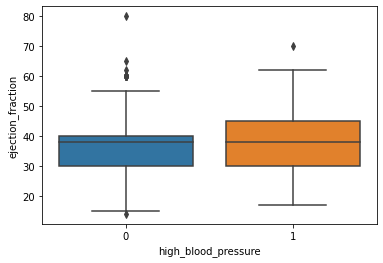

In [72]:
sns.boxplot(df.high_blood_pressure, df.ejection_fraction)

In [73]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='serum_creatinine', ylabel='serum_sodium'>

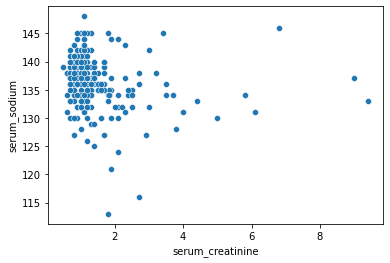

In [74]:
sns.scatterplot(df.serum_creatinine, df.serum_sodium)

In [97]:
dsr = df[(df.serum_creatinine <= 4) & (df.serum_sodium > 120)]
dsr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,yes
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1,Male,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Male,no
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Female,no
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Female,no
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Male,no


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


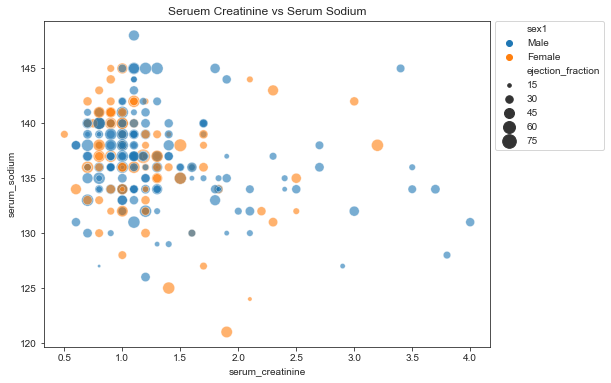

In [240]:
plt.figure(figsize=(8, 6))
sns.scatterplot(dsr.serum_creatinine, dsr.serum_sodium, 
                hue=dsr.sex1, size = dsr.ejection_fraction,
               sizes = (10, 200), alpha=0.6)
plt.title("Seruem Creatinine vs Serum Sodium")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.show()

In [92]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


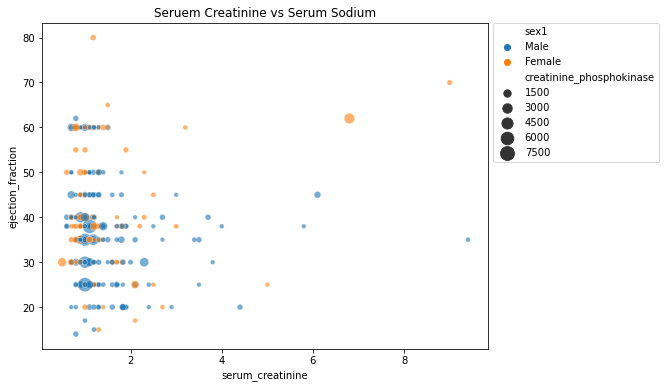

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df.serum_creatinine, df.ejection_fraction, 
                hue=df.sex1, size = df.creatinine_phosphokinase,
               sizes = (20, 200), alpha=0.6)
plt.title("Seruem Creatinine vs Serum Sodium")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.show()

In [105]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


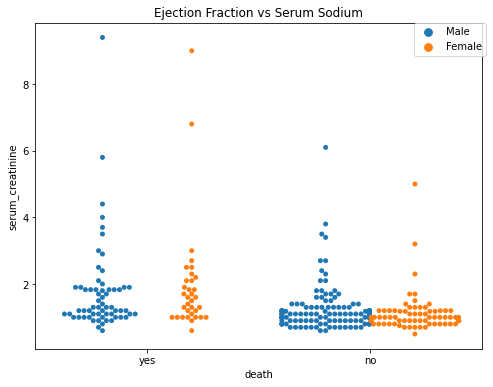

In [108]:
plt.figure(figsize=(8, 6))
sns.swarmplot(df.death, df.serum_creatinine,
                hue=df.sex1, split=True)
plt.title("Ejection Fraction vs Serum Sodium")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.show()

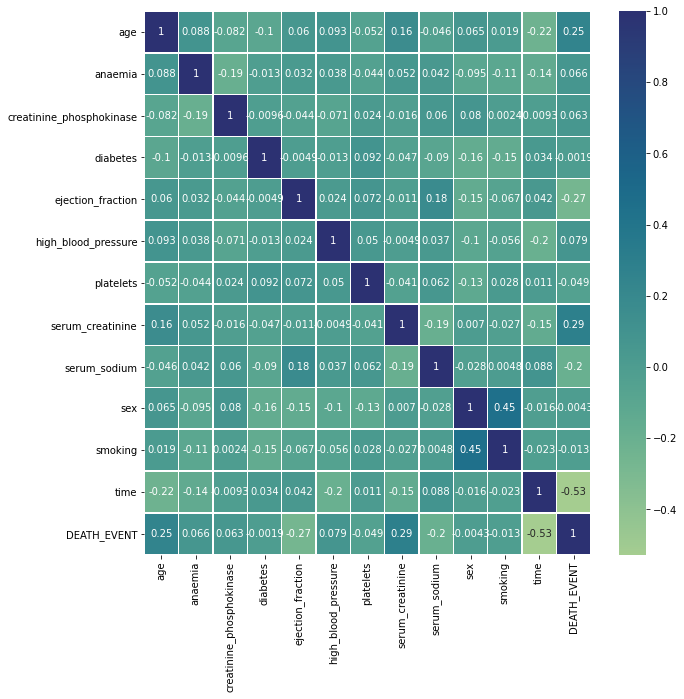

In [111]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

In [113]:
d= pd.read_csv("telecom_users.csv")
d.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [114]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

In [199]:
s = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time"].mean().reset_index()
s

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,death,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,no,540.054187,40.26601,266657.489901,1.184877,137.216749,158.339901
1,yes,670.197917,33.46875,256381.044792,1.835833,135.375000,70.885417


In [201]:
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time"].agg([np.mean, np.median])
y

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187    245          40.26601     38  266657.489901   
yes                 670.197917    259          33.46875     30  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

In [129]:
s

,death,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,no,540.054187,40.26601,266657.489901,1.184877,137.216749,158.339901
1,yes,670.197917,33.46875,256381.044792,1.835833,135.375000,70.885417


In [133]:
s = s.T
s, s.columns = s[1:], s.iloc[0]

In [141]:
s.reset_index()

death,index,no,yes
0,creatinine_phosphokinase,540.054,670.198
1,ejection_fraction,40.266,33.4688
2,platelets,266657,256381
3,serum_creatinine,1.18488,1.83583
4,serum_sodium,137.217,135.375
5,time,158.34,70.8854


In [144]:
s1 = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction",
                       "serum_sodium", "time"].mean().reset_index()
s1

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,death,creatinine_phosphokinase,ejection_fraction,serum_sodium,time
0,no,540.054187,40.26601,137.216749,158.339901
1,yes,670.197917,33.46875,135.375000,70.885417


In [145]:
s1 = s1.T
s1, s1.columns = s1[1:], s1.iloc[0]

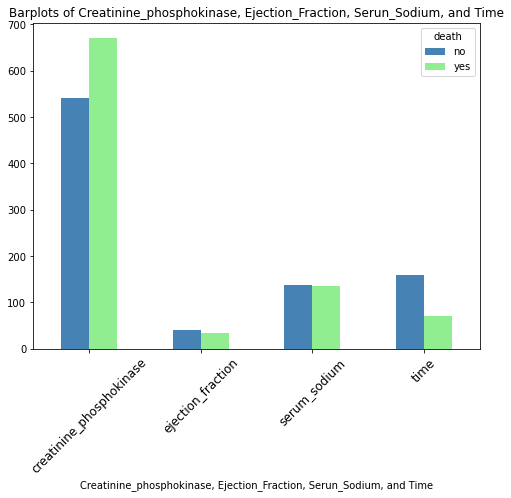

In [150]:
s1.reset_index().plot(x = 'index', y = ['no', 'yes'], kind = 'bar',
                      figsize=(8, 6), color=['steelblue', 'lightgreen'])
plt.xticks(rotation=45, fontsize=12)
plt.title("Barplots of Creatinine_phosphokinase, Ejection_Fraction, Serun_Sodium, and Time")
plt.xlabel("Creatinine_phosphokinase, Ejection_Fraction, Serun_Sodium, and Time")
plt.show("Death")  

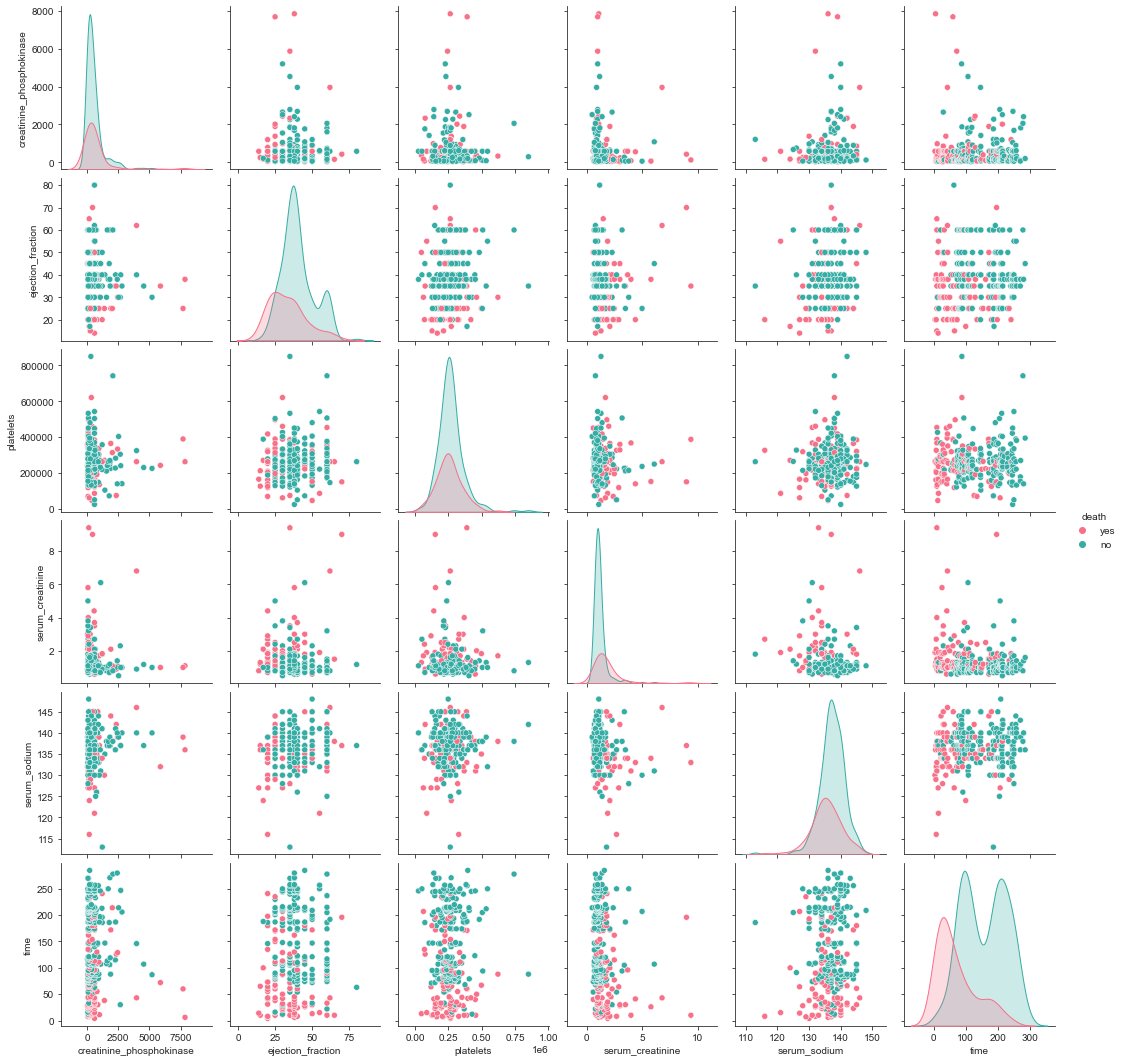

In [153]:
sns.set_style('ticks')
sns.pairplot(df[["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time", "death"]], hue = "death", 
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [154]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


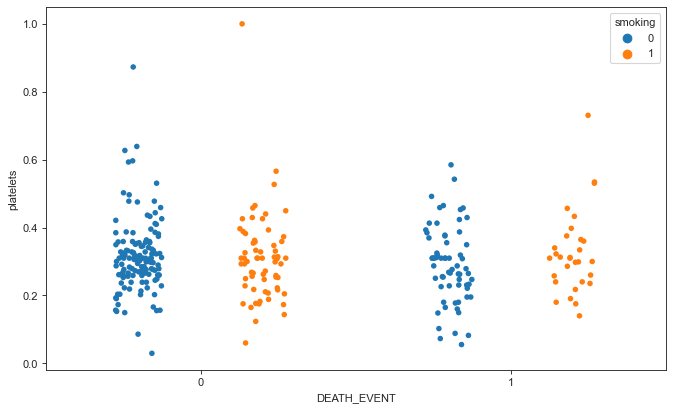

In [314]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df.DEATH_EVENT, df.platelets, jitter=0.15,hue=df.smoking, split=True,
             size=5, ax=ax)
plt.tick_params(rotation=0)
plt.show()

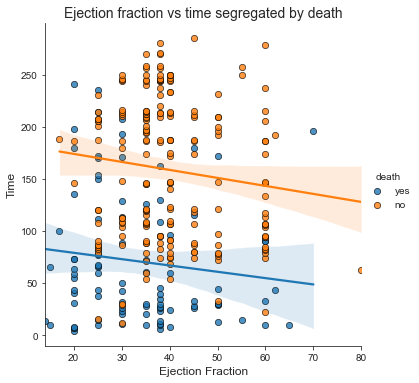

In [243]:
sns.lmplot(x="ejection_fraction", y="time", 
           hue="death", data=df, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

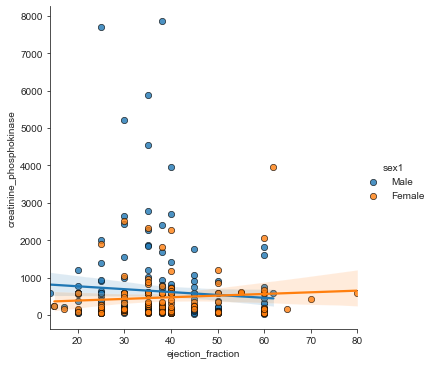

In [242]:
sns.lmplot(x="ejection_fraction", y="creatinine_phosphokinase", 
           hue="sex1", data=df, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.show()

<Figure size 960x480 with 0 Axes>

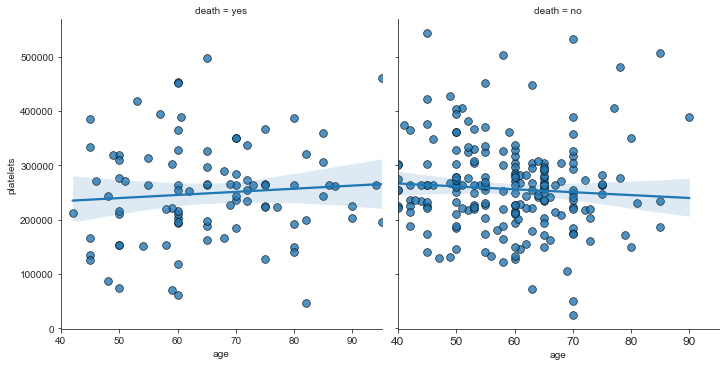

In [278]:
fig = plt.figure(figsize=(12, 6), dpi=80)
g = sns.lmplot(x='age', y='platelets', 
               data = df[(df.creatinine_phosphokinase < 6000) & (df.platelets < 600000)], 
               robust = True,
              palette="Set1", col="death",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
plt.xticks(fontsize=12, )
plt.yticks(fontsize=12)
plt.show()

<Figure size 1120x560 with 0 Axes>

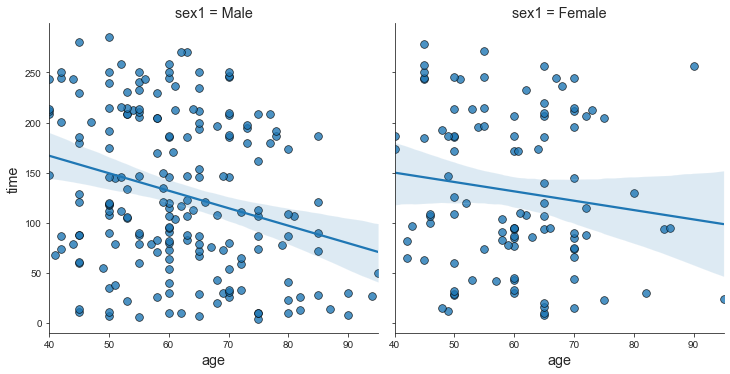

In [279]:
fig = plt.figure(figsize=(14, 7), dpi=80)
g = sns.lmplot(x='age', y='time', 
               data = df, 
               robust = True,
              palette="Set1", col="sex1",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')


In [202]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

In [322]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex', 'smoking']

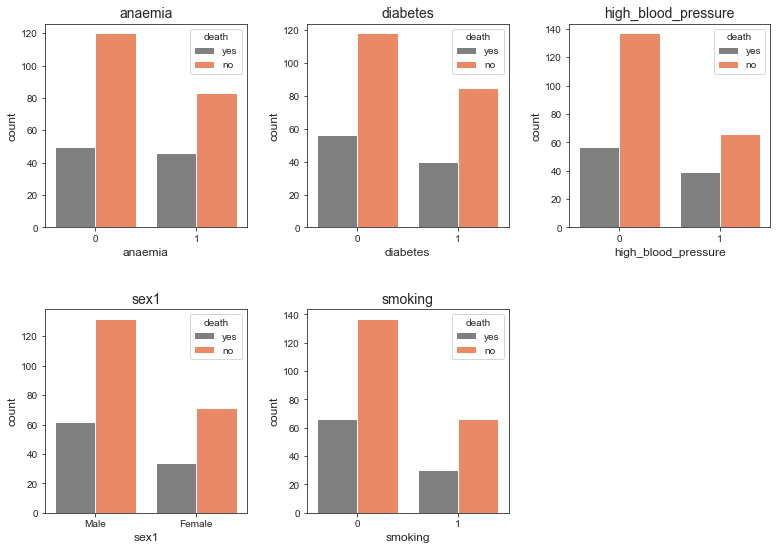

In [224]:
plt.figure(figsize=(13, 9))

for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])

In [324]:
df[binary_var].value_count(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [227]:
df.groupby('death')['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking'].agg([np.size]).reset_index()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,death,anaemia,diabetes,high_blood_pressure,sex1,smoking
,,size,size,size,size,size
0,no,203,203,203,203,203
1,yes,96,96,96,96,96


In [228]:
def cross(a):
    x = pd.crosstab(df[a], df['death'])
    return x.apply(lambda z: z/z.sum(), axis=1)

In [230]:
cross("anaemia")

death,no,yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


In [231]:
cross("diabetes")

death,no,yes
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000


In [232]:
cross("smoking")

death,no,yes
smoking,,
0,0.674877,0.325123
1,0.687500,0.312500


In [233]:
cross("high_blood_pressure")

death,no,yes
high_blood_pressure,,
0,0.706186,0.293814
1,0.628571,0.371429


In [244]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'sex1', 'death'],
      dtype='object')

In [260]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,yes


In [281]:
df = df.drop(columns=['sex1', 'death'])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [283]:
df = df.dropna()

In [286]:
df1 = df

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [303]:
continuous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

In [287]:
for i in continous_var:
    df1[i] = df1[i]/max(df1[i])

In [288]:
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.789474,0,0.074036,0,0.250,1,0.311765,0.202128,0.878378,1,0,4,1
1,0.578947,0,1.000000,0,0.475,0,0.309833,0.117021,0.918919,1,0,6,1
2,0.684211,0,0.018573,0,0.250,0,0.190588,0.138298,0.871622,1,1,7,1
3,0.526316,1,0.014120,0,0.250,0,0.247059,0.202128,0.925676,1,0,7,1
4,0.684211,1,0.020354,1,0.250,0,0.384706,0.287234,0.783784,0,0,8,1


In [289]:
X = df1.drop(columns=['DEATH_EVENT'])
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.789474,0,0.074036,0,0.250,1,0.311765,0.202128,0.878378,1,0,4
1,0.578947,0,1.000000,0,0.475,0,0.309833,0.117021,0.918919,1,0,6
2,0.684211,0,0.018573,0,0.250,0,0.190588,0.138298,0.871622,1,1,7
3,0.526316,1,0.014120,0,0.250,0,0.247059,0.202128,0.925676,1,0,7
4,0.684211,1,0.020354,1,0.250,0,0.384706,0.287234,0.783784,0,0,8


In [290]:
y = df1['DEATH_EVENT']

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=22)

In [301]:
clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.84
Precision: 0.9215686274509803
Recall: 0.8545454545454545
F Score: 0.8867924528301887
Confusion Matrix:
 [[47  8]
 [ 4 16]]


In [302]:
clf_tree.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [300]:
for md in range(3,10):
    for mln in range(3,10):
        clf_tree = DecisionTreeClassifier(random_state=21, max_depth = md, max_leaf_nodes=mln).fit(X_train,y_train)
        y_pred = clf_tree.predict(X_test)
        print("Max Depth and Max Leaf Nodes:", md, mln)
        print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
        print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
        print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
        print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
        print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Max Depth and Max Leaf Nodes: 3 3
Accuracy: 0.8
Precision: 0.9347826086956522
Recall: 0.7818181818181819
F Score: 0.8514851485148516
Confusion Matrix:
 [[43 12]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 4
Accuracy: 0.7866666666666666
Precision: 0.9148936170212766
Recall: 0.7818181818181819
F Score: 0.8431372549019609
Confusion Matrix:
 [[43 12]
 [ 4 16]]
Max Depth and Max Leaf Nodes: 3 5
Accuracy: 0.7866666666666666
Precision: 0.9148936170212766
Recall: 0.7818181818181819
F Score: 0.8431372549019609
Confusion Matrix:
 [[43 12]
 [ 4 16]]
Max Depth and Max Leaf Nodes: 3 6
Accuracy: 0.7466666666666667
Precision: 0.86
Recall: 0.7818181818181819
F Score: 0.819047619047619
Confusion Matrix:
 [[43 12]
 [ 7 13]]
Max Depth and Max Leaf Nodes: 3 7
Accuracy: 0.7466666666666667
Precision: 0.86
Recall: 0.7818181818181819
F Score: 0.819047619047619
Confusion Matrix:
 [[43 12]
 [ 7 13]]
Max Depth and Max Leaf Nodes: 3 8
Accuracy: 0.7466666666666667
Precision: 0.86
Recall: 0.7818181818181819
F Score: 

In [304]:
df2 = df1

In [306]:
df2 = df2.drop(columns=['anaemia', 'diabetes', 'sex', 'smoking', 
                       'creatinine_phosphokinase'])
df2.head()

,age,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.789474,0.250,1,0.311765,0.202128,0.878378,4,1
1,0.578947,0.475,0,0.309833,0.117021,0.918919,6,1
2,0.684211,0.250,0,0.190588,0.138298,0.871622,7,1
3,0.526316,0.250,0,0.247059,0.202128,0.925676,7,1
4,0.684211,0.250,0,0.384706,0.287234,0.783784,8,1


In [307]:
X = df2.drop(columns=['DEATH_EVENT'])
y = df2['DEATH_EVENT']

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=22)

In [309]:
clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]


In [310]:
for md in range(3,10):
    for mln in range(3,10):
        clf_tree = DecisionTreeClassifier(random_state=21, max_depth = md, max_leaf_nodes=mln).fit(X_train,y_train)
        y_pred = clf_tree.predict(X_test)
        print("Max Depth and Max Leaf Nodes:", md, mln)
        print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
        print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
        print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
        print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
        print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Max Depth and Max Leaf Nodes: 3 3
Accuracy: 0.8
Precision: 0.9347826086956522
Recall: 0.7818181818181819
F Score: 0.8514851485148516
Confusion Matrix:
 [[43 12]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 4
Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 5
Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 6
Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 7
Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
Max Depth and Max Leaf Nodes: 3 8
Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Ma

In [311]:
df2.columns

Index(['age', 'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT'],
      dtype='object')